<a href="https://colab.research.google.com/github/Elma-dev/Feuel_consumption_ML/blob/main/Feuel_consumption_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#<center>**Impot Data**</center>

In [2]:
data=pd.read_csv("Fuel_Consumption_2000-2022.csv")

In [3]:
data.head()

YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4        198

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


#<center>**DataAnalysis**</center>

In [5]:
data.describe()

YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22556.000000  22556.000000  22556.000000      22556.000000   
mean    2011.554442      3.356646      5.854141         12.763513   
std        6.298269      1.335425      1.819597          3.500999   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.725000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22556.000000     22556.000000  22556.000000  22556.000000  
mean         8.919126        11.034341     27.374534    250.068452  
std          2.274764         2.910920      7.376982     59.355276  
min          3.200000         3.600000     11.000000     83.000000  
25%          7.300000         9.100000     22.000000    209.000000  
50%          8.400000        10.600000     27.000000    243.000000  
75%         10.200000        12.700000     31.000000    288.000000  
max         20.900000        26.100000     78.000000    608.000000

## **DATA EXPLORATION**

In [6]:
#Year
px.pie(data_frame=data,names='YEAR')

In [7]:
#TO UPPER
data["VEHICLE CLASS"]=data["VEHICLE CLASS"].apply(str.upper)

In [8]:
#VEHICLE CLASS 
v_class=data.groupby("VEHICLE CLASS").count().reset_index()
px.histogram(data_frame=v_class,x="VEHICLE CLASS",y="YEAR")

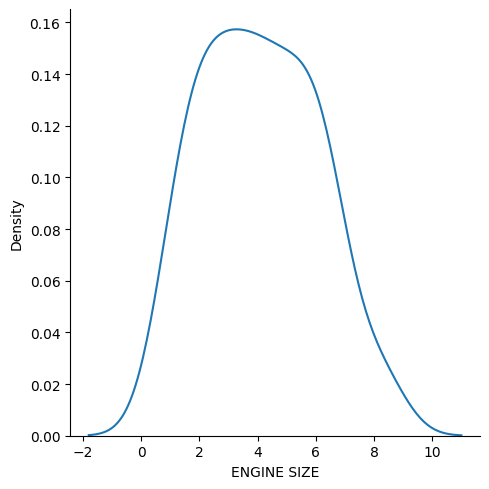

In [9]:
#Engine size Distribution
engine_size_count=data.groupby("ENGINE SIZE").count().reset_index()
sns.displot(engine_size_count,x="ENGINE SIZE",kind="kde")
plt.show()

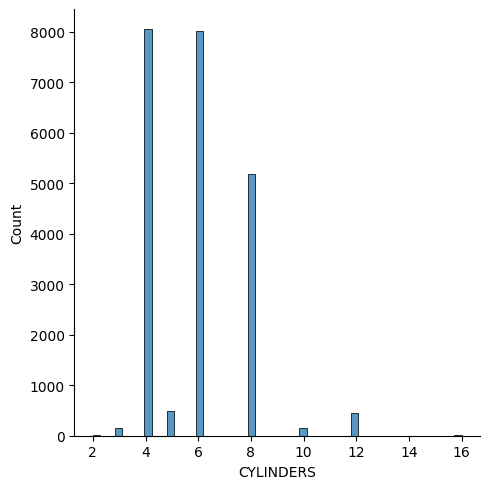

In [10]:
#cylinders Distribution 
sns.displot(data,x="CYLINDERS")
plt.show()

In [11]:
#TRANSMISSION
transm_count=data.groupby("TRANSMISSION").count().reset_index()
px.histogram(data_frame=transm_count,x="TRANSMISSION",y="MAKE")

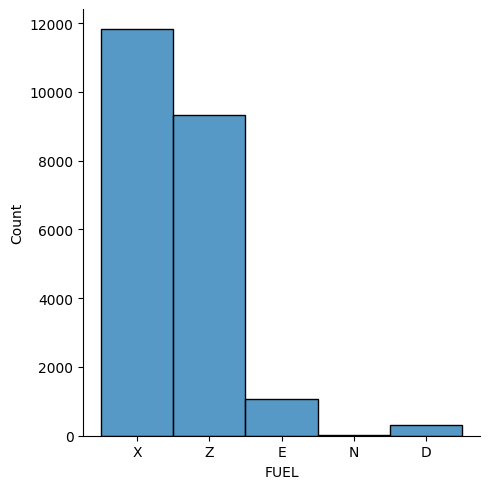

In [12]:
#feul Type
sns.displot(data,x="FUEL")

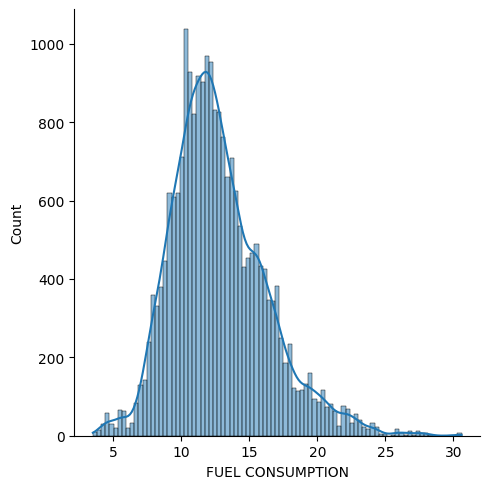

In [13]:
#FUEL CONSUMPTION distr
sns.displot(data,x="FUEL CONSUMPTION",kde=True)

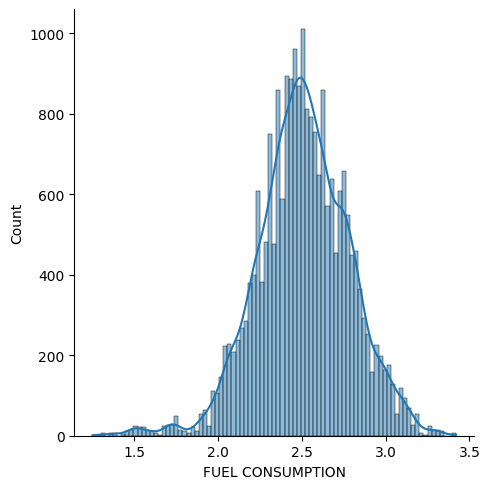

In [14]:
#Solve Skew Prob
sns.displot(np.log(data["FUEL CONSUMPTION"]),kde=True)

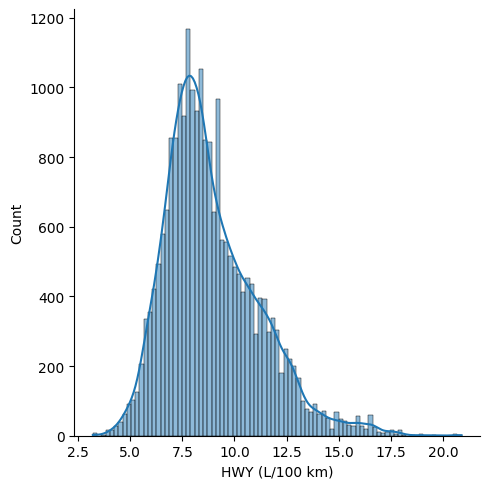

In [15]:
sns.displot(data,x="HWY (L/100 km)",kde=True)

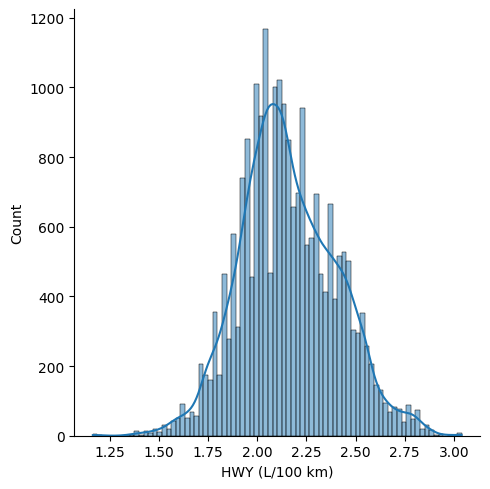

In [16]:
#Solve Skew Prob
sns.displot(np.log(data["HWY (L/100 km)"]),kde=True)

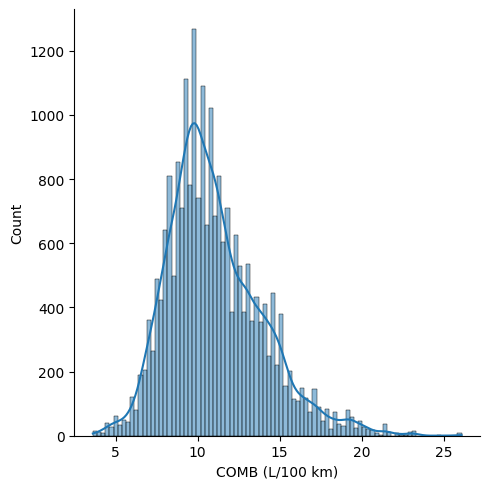

In [17]:
#COMB (L/100 km)
sns.displot(data,x="COMB (L/100 km)",kde=True)

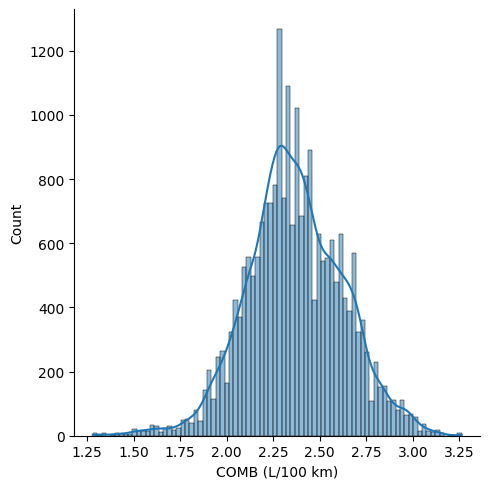

In [18]:
#Solve Skew Prob
sns.displot(np.log(data["COMB (L/100 km)"]),kde=True)

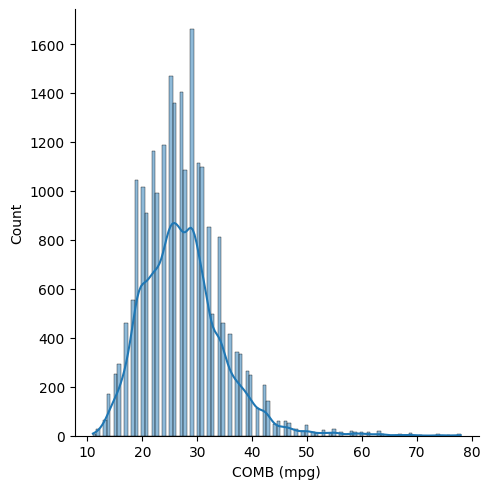

In [19]:
#COMB (mpg)
sns.displot(data,x="COMB (mpg)",kde=True)

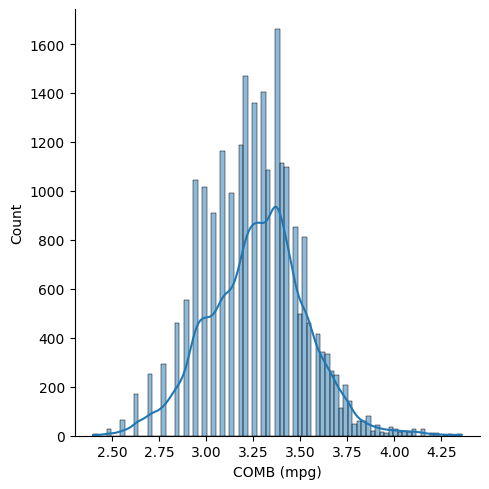

In [20]:
#Solve Skew Prob
sns.displot(np.log(data["COMB (mpg)"]),kde=True)

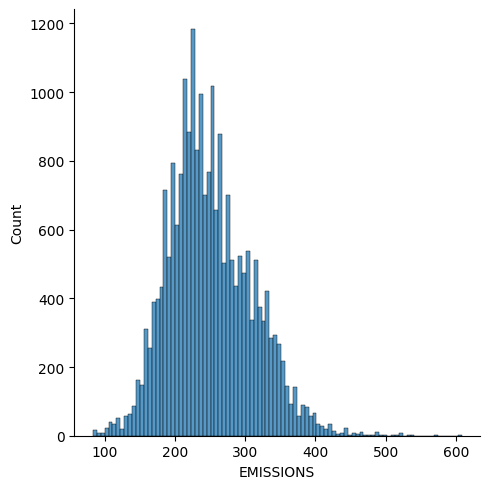

In [21]:
sns.displot(data,x="EMISSIONS")

## **DATA ANA: Num Features**

<ipython-input-22-4503ec4b92db>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



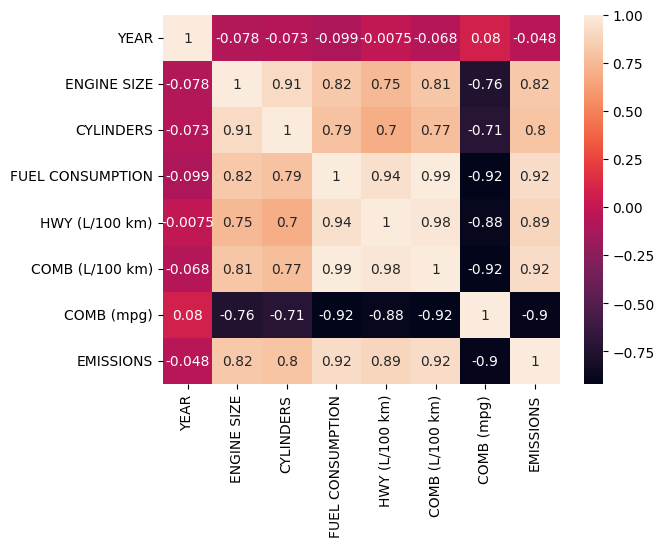

In [22]:
#Correlations
sns .heatmap(data.corr(),annot=True)
plt.show()

### **Analyse Features with High Correlation**

In [23]:
# FeulConsumption Vs Emmission
px.scatter(data,x="EMISSIONS",y="FUEL CONSUMPTION",opacity=0.5,trendline="ols", trendline_color_override="black")

In [24]:
#COMB (mpg) Vs FUEL CONSUMPTION
px.scatter(data,x="COMB (mpg)",y="FUEL CONSUMPTION",trendline="lowess",trendline_color_override="black")

In [25]:
#COMB (L/100 KM) Vs FUEL CONSUMPTION
px.scatter(data,x="COMB (L/100 km)",y="FUEL CONSUMPTION",trendline="lowess",trendline_color_override="black")

In [26]:
#HWY (L/100 KM) Vs FUEL CONSUMPTION
px.scatter(data,x="HWY (L/100 km)",y="FUEL CONSUMPTION",trendline="lowess",trendline_color_override="black", opacity=0.3)

In [27]:
#CYLINDERS Vs Fuel
cylin_fuelCons=data.groupby("CYLINDERS").mean().reset_index()
px.bar(cylin_fuelCons,x="CYLINDERS",y="FUEL CONSUMPTION",labels={"FUEL CONSUMPTION":"FUEL CONSUMPTION AVG"})

<ipython-input-27-3df93f4236ae>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [28]:
#Explanation OF Consumption IN 2 cylinders
explanation=data.groupby("CYLINDERS").count().reset_index()
px.pie(explanation,names="CYLINDERS",values="YEAR")

In [29]:
px.scatter(data,x="ENGINE SIZE",y="FUEL CONSUMPTION",trendline="lowess",trendline_color_override="black")

### **Data With less Corr**

In [30]:
#Years Vs Consumption
years_cons=data.groupby("YEAR").mean().reset_index()
px.bar(years_cons,x="YEAR",y="FUEL CONSUMPTION")

<ipython-input-30-1f1deb7ccf97>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## **DATA ANA: Categorical Data**

In [31]:
cat_data=[i for i in data.columns if data[i].dtype==object]
print(f'Categorical_Columns={cat_data}')

Categorical_Columns=['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']


In [32]:
data[cat_data].head(5)

MAKE    MODEL VEHICLE CLASS TRANSMISSION FUEL
0  ACURA    1.6EL       COMPACT           A4    X
1  ACURA    1.6EL       COMPACT           M5    X
2  ACURA    3.2TL      MID-SIZE          AS5    Z
3  ACURA    3.5RL      MID-SIZE           A4    Z
4  ACURA  INTEGRA    SUBCOMPACT           A4    X

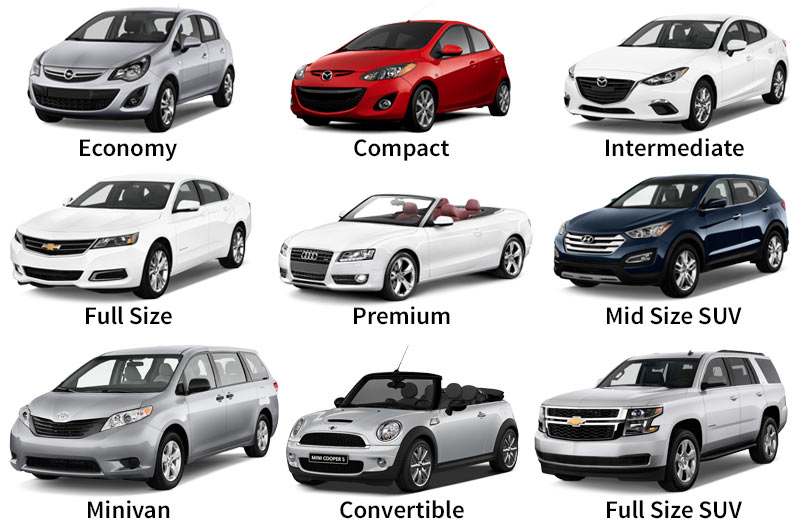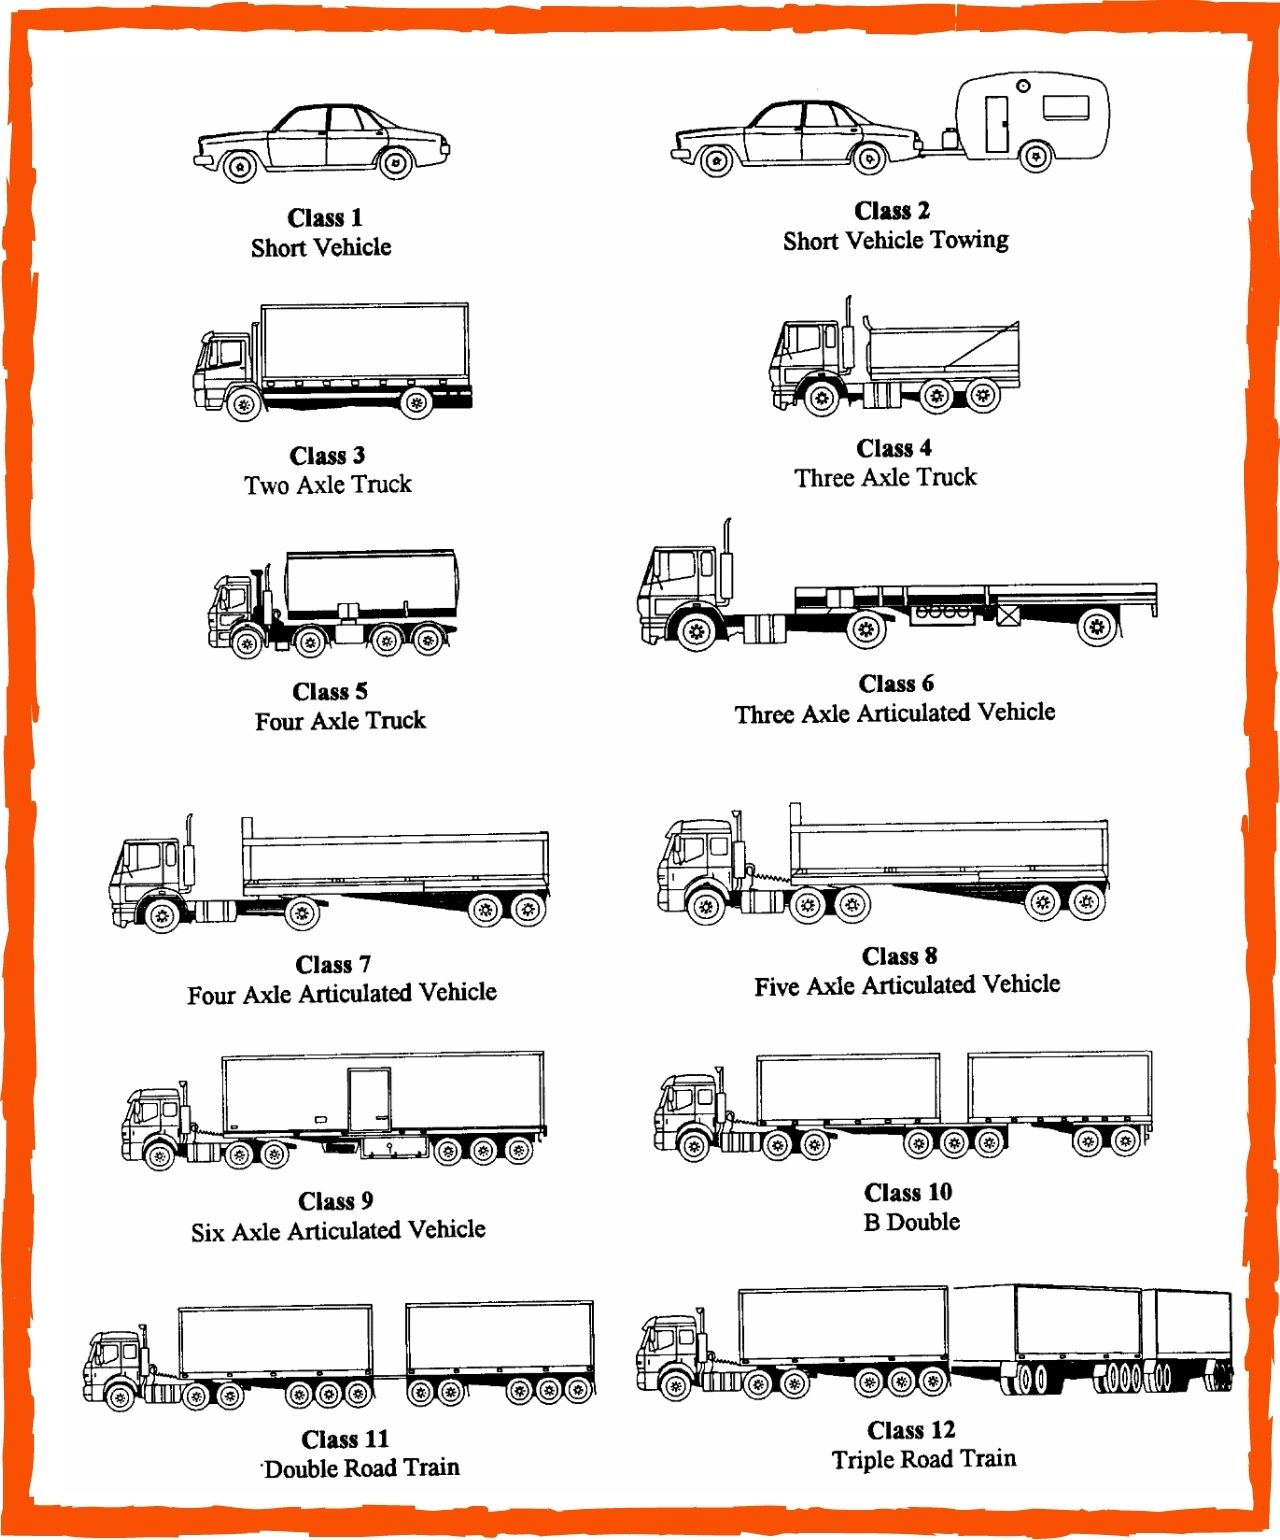

In [33]:
#MAKE And Model doesn't make sense in our data
#Vehicle Class Vs FUEL CONSUMPTION
vclassVsFeul=data.groupby("VEHICLE CLASS").mean()["FUEL CONSUMPTION"].to_frame().reset_index()
px.histogram(vclassVsFeul,x="VEHICLE CLASS",y="FUEL CONSUMPTION",labels={"FUEL CONSUMPTION":"AVG OF FUEL CONSUMPTION"})

<ipython-input-33-e516f0b57629>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [40]:
#TRANSMISSION & VEHICLE CLAS vs  FUEL CONSUMPTION
veh_tran_fuel=data.groupby(["VEHICLE CLASS","TRANSMISSION"]).mean()["FUEL CONSUMPTION"].to_frame().reset_index()
px.histogram(veh_tran_fuel,x="VEHICLE CLASS",y="FUEL CONSUMPTION",color="TRANSMISSION",text_auto=True)

<ipython-input-40-cc90dd63708a>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [35]:
fuetType_Cons=data.groupby("FUEL").mean()["FUEL CONSUMPTION"].reset_index()
px.histogram(fuetType_Cons,x="FUEL",y="FUEL CONSUMPTION")

<ipython-input-35-1352cc0478aa>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#<center>**Data Preprocessing**</center>

## **Chose features Train ML Model**

In [42]:
x_col_name=["EMISSIONS","COMB (L/100 km)","HWY (L/100 km)","CYLINDERS","ENGINE SIZE","VEHICLE CLASS","FUEL"]
x_cat_name=["VEHICLE CLASS","FUEL"]
y_col_name=["FUEL CONSUMPTION"]

In [54]:
X=data[x_col_name]
y=data[y_col_name]

## **Missing Data**

In [43]:
#nane Value
data.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [44]:
#null value
data.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

## **Encoding Data (Categorical)**

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
col_tran=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),x_cat_name)],remainder="passthrough")
col_tran

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(),
                                 ['VEHICLE CLASS', 'FUEL'])])

In [123]:
X_encod=col_tran.fit_transform(data[x_col_name])
print(f'Shape of new Data: {X_encod.shape}')
X_encod

Shape of new Data: (22556, 34)


<22556x34 sparse matrix of type '<class 'numpy.float64'>'
	with 157892 stored elements in Compressed Sparse Row format>

## **Spliting Data**

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_encod,y.values,test_size=0.2)

In [142]:
#"SciPy sparse matrix" to a "NumPy matrix"
x_train,x_test=x_train.toarray(),x_test.toarray()

In [145]:
print(f'x_train_shape: {x_train.shape}')
print(f'x_test_shape: {x_test.shape}')
print(f'y_test_shape: {y_test.shape}')
print(f'y_train_shape: {y_train.shape}')

x_train_shape: (18044, 34)
x_test_shape: (4512, 34)
y_test_shape: (4512, 1)
y_train_shape: (18044, 1)


## **Feature Scaling** 

In [148]:
from sklearn.preprocessing import StandardScaler
scale_x=StandardScaler()
scale_y=StandardScaler()

In [152]:
scale_x.fit(x_train)
scale_y.fit(y_train)

StandardScaler()

In [153]:
x_train_trans=scale_x.transform(x_train)
x_test_trans=scale_x.transform(x_test)
y_train_trans=scale_y.transform(y_train)
y_test_trans=scale_y.transform(y_test)

#<center> **ML Chose Model**</center>

## **LinearRegression**

In [154]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linModel=LinearRegression()

In [155]:
linModel.fit(x_train_trans,y_train_trans)

LinearRegression()

In [193]:
from sklearn.metrics import mean_squared_error,r2_score
y_predict=scale_y.inverse_transform(linModel.predict(x_test_trans))
print(f'r2_score={r2_score(y_test,y_predict)}')
print(f'MSE={mean_squared_error(y_test,y_predict)}')

r2_score=0.9995514465715722
MSE=0.005592927740545673


### **LinReg ValidationCross**

In [175]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.pipeline import Pipeline

In [165]:
#Create linReg instance
linRegInst=LinearRegression()

In [169]:
steps=list()
steps.append(('scaler',StandardScaler()))
steps.append(('model',linRegInst))
pipeline=Pipeline(steps=steps)

In [179]:
pipline

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [178]:
kFold=KFold(n_splits=7,random_state=42,shuffle=True)

In [182]:
X_val_data=X_encod.toarray()
y_val_data=data[y_col_name].values

In [185]:
print(f'cross_val_score={cross_val_score(pipeline,X_val_data,y_val_data,cv=kFold,n_jobs=-1,error_score="raise")}')

cross_val_score=[0.9994888  0.99952625 0.99949237 0.99960499 0.99903421 0.99952249
 0.99952584]


## ***SVM : Support Vector Machine***

In [186]:
from sklearn.svm import SVR 
svrModel=SVR(kernel="rbf")

In [191]:
svrModel.fit(x_train_trans,y_train_trans.reshape(-1,))

SVR()

In [192]:
svrModel.score(x_test_trans,y_test_trans)

0.996630140956045